# Netflix Recommender Project
---

In [ ]:
#Import Necessary Library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Exploratory Data Analysis(EDA)


In [ ]:
df = pd.read_csv("netflix.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Dataset İnfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Null Data
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['director'] = df['director'].fillna('')
df['cast'] = df['cast'].fillna('')
df['country'] = df['country'].fillna('')
df['rating'] = df['rating'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df = df.drop(columns=['show_id'])


KeyError: "['show_id'] not found in axis"

In [ ]:
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Seperate Movie and Series

In [ ]:
def get_content_type(duration):
  if"min" in duration:
    return "Movie"
  elif "Season" in duration:
    return "TV Show"
  else:
    return "Unknown"

In [ ]:
df["content_type"] = df["duration"].apply(get_content_type)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_type
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show
3,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Movie
8803,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",TV Show
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Movie
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Movie


# Data Visualization

<ipython-input-25-7f14bc033417>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts[:20].values, y=genre_counts[:20].index, palette="viridis")


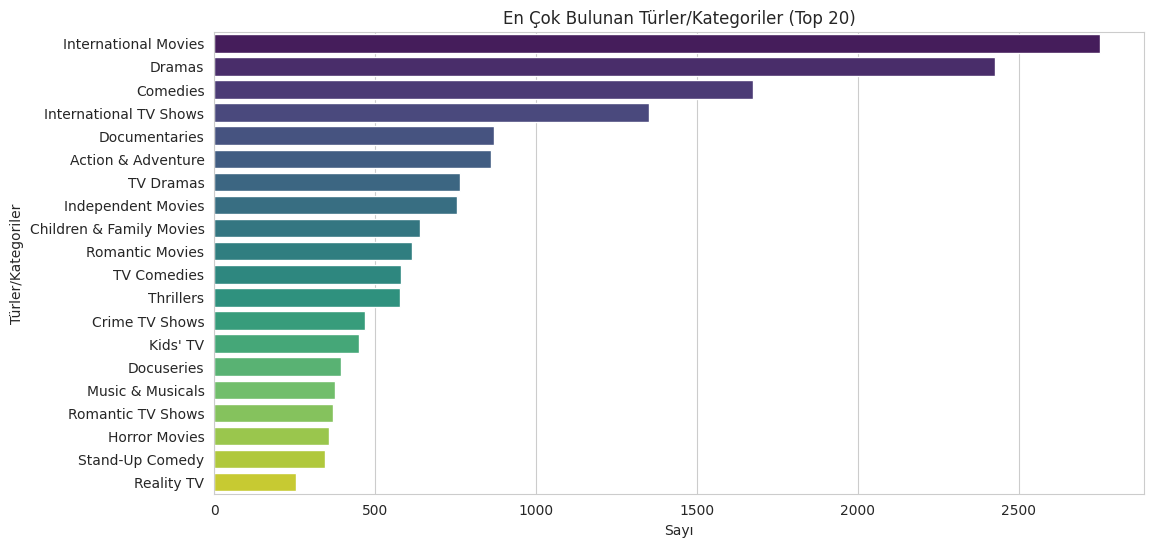

In [ ]:
sns.set_style("whitegrid")

all_genres = df["listed_in"].str.split(", ").explode()

genre_counts = all_genres.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts[:20].values, y=genre_counts[:20].index, palette="viridis")
plt.title('En Çok Bulunan Türler/Kategoriler (Top 20)')
plt.xlabel('Sayı')
plt.ylabel('Türler/Kategoriler')
plt.show()

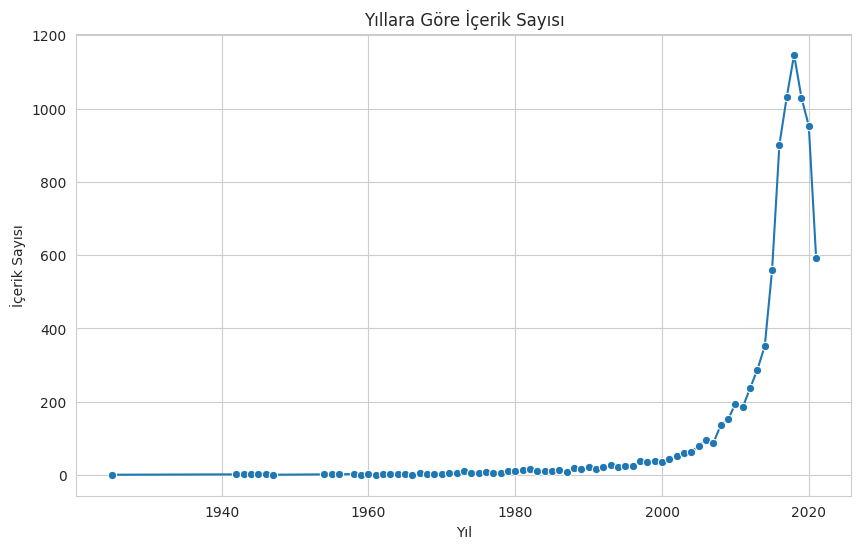

In [ ]:
plt.figure(figsize=(10,6))
year_counts = df['release_year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title('Yıllara Göre İçerik Sayısı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.grid(True)
plt.show()

<ipython-input-29-2e72a3627fb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts[:20].values, y=country_counts[:20].index, palette="magma")


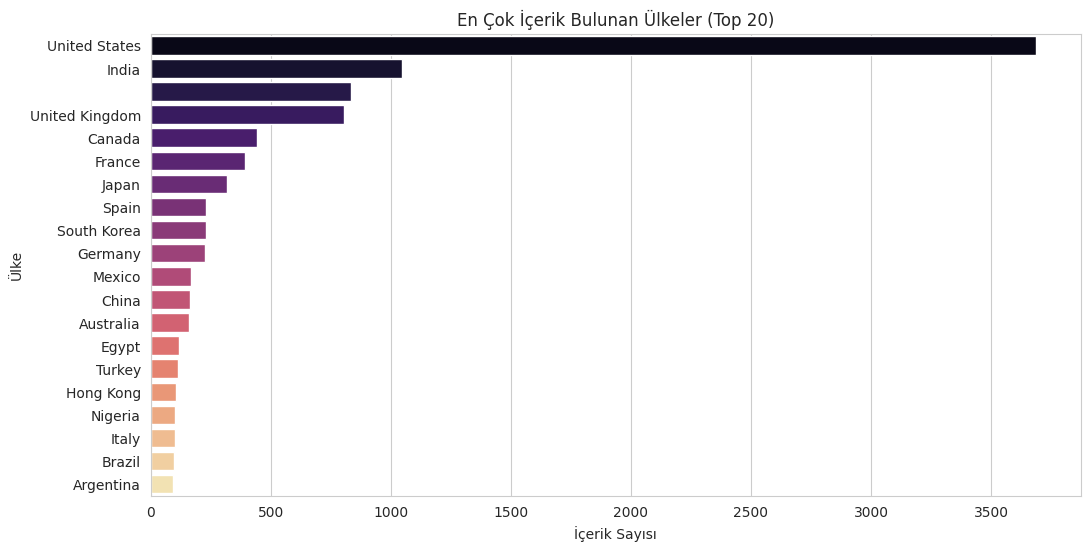

In [ ]:
df_countries = df.dropna(subset=['country'])
all_countries = df_countries['country'].str.split(', ').explode()

country_counts = all_countries.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts[:20].values, y=country_counts[:20].index, palette="magma")
plt.title('En Çok İçerik Bulunan Ülkeler (Top 20)')
plt.xlabel('İçerik Sayısı')
plt.ylabel('Ülke')
plt.show()

<ipython-input-30-90120e387c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")


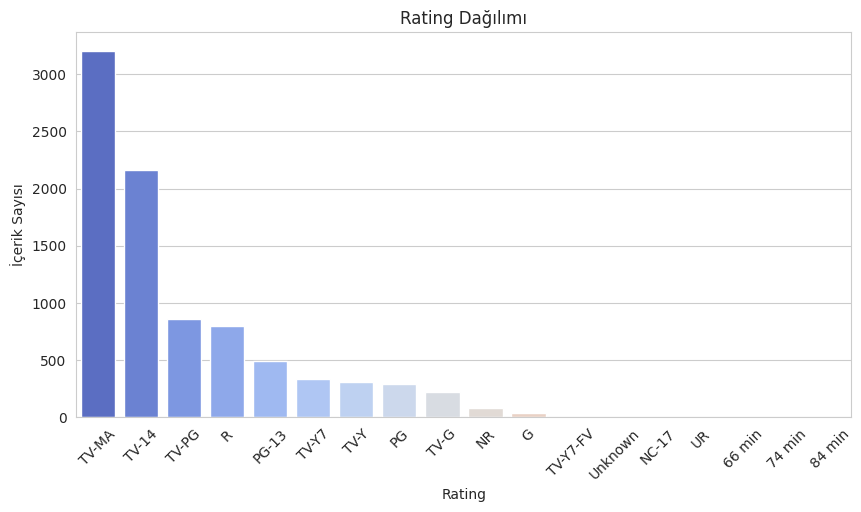

In [ ]:
df['rating'] = df['rating'].fillna('Unknown')

rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title('Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.show()


# I Convert DataFrame to CSV because I will work with Streamlit in Pycharm


In [ ]:
df.to_csv("netflix_clenade.csv",index=False)

from google.colab import files
files.download("netflix_clenade.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>